<a href="https://colab.research.google.com/github/SEJUNTONY/Data_Science_Class/blob/main/%EB%AC%B4%EC%97%AD%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%97%B0%EC%8A%B5_1127.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 라이브러리 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
# 함수

def outliers_iqr(data) :
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3 - q1
    lower_bound = 0
    upper_bound = 3000

    return np.where((data > upper_bound)|(data<lower_bound))

def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
filename = '/content/drive/MyDrive/무역_베트남.csv'

vietnam = pd.read_csv(filename)
vietnam.head()

,EXPOR_NTN_NM,HS_CD,ARRVL_YRMNT,VTNM_TRAD_INVCE_AMT,ARRVL_PRT_NM
0,CHINA,85322400,2021-02-22,10.92,VNCLI
1,CHINA,85030090,2021-02-22,224.32,VNCLI
2,CHINA,84733090,2021-02-22,3840.00,VNSGN
3,CHINA,82075000,2021-02-22,62.00,VNCLI
4,CHINA,85076090,2021-02-22,9.15,VNSGN


In [6]:
vietnam.shape

(9999, 5)

In [7]:
vietnam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EXPOR_NTN_NM         9999 non-null   object 
 1   HS_CD                9999 non-null   int64  
 2   ARRVL_YRMNT          9999 non-null   object 
 3   VTNM_TRAD_INVCE_AMT  9999 non-null   float64
 4   ARRVL_PRT_NM         9999 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 390.7+ KB


In [8]:
vietnam.describe(include="object")

,EXPOR_NTN_NM,ARRVL_YRMNT,ARRVL_PRT_NM
count,9999,9999,9999
unique,1,80,101
top,CHINA,2021-02-23,VNCLI
freq,9999,655,3316


먼저, 도착항구명을 파악해보았다.

In [9]:
vietnam['ARRVL_PRT_NM'].unique()

array(['VNCLI', 'VNSGN', 'VNDVU', 'VNHAN', 'VNDTS', 'VNDVN', 'VNHUGT',
       'VNZZZ', 'VNDNH', 'VNNEK', 'VNBDU', 'VNNHC', 'VNTCN', 'VNCXP',
       'VNHPN', 'VNMOCT', 'VNMTCT', 'VNCLH', 'VNTCE', 'VNHOOT', 'VNFCV',
       'VNPLT', 'VNCHAT', 'VNCOMT', 'VNFDW', 'VNXGL', 'VNHPH', 'VNXFV',
       'VNXOM', 'VNYVHN', 'VNHNC', 'VNBNG', 'VNPLF', 'VNITC', 'VNFBFL',
       'VNXSG', 'VNNCI', 'VNHIA', 'VNXER', 'VNXKC', 'VNPTS', 'VNXBP',
       'VNGEE', 'VNXEB', 'VNTTHT', 'VNFDA', 'VNTAP', 'VNVIC', 'VNXPE',
       'VNXLG', 'VNHDI', 'VNBPST', 'VNTTS', 'VNXQD', 'VNDAD', 'VNCVE',
       'VNXEN', 'VNLAOT', 'VNXAD', 'VNLAIT', 'VNDAN', 'VNXAMT', 'VNFCU',
       'VNFAF', 'VNXSIL', 'VNFBT', 'VNXQC', 'VNLOT', 'VNFAD', 'VNTCI',
       'VNUIH', 'VNXON', 'VNXQI', 'VNTTT', 'VNXEV', 'VNXAR', 'VNXFB',
       'VNNDKL', 'VNQPH', 'VNCMY', 'VNXAL', 'VNXGR', 'VNTAGT', 'VNXEG',
       'VNFBD', 'VNTTN', 'VNXAS', 'VNXFT', 'VNXNW', 'VNXGA', 'VNXBE',
       'VNDGLS', 'VNTTYT', 'VNXCF', 'VNSDG', 'VNHON', 'VNXEI', 'VNXQJ',
  

In [10]:
vietnam['ARRVL_PRT_NM'].nunique()

101

도착항구는 중복없이 총 101곳이 있다.

In [11]:
# 항구별 무역건수 순위파악
con_df1 = pd.DataFrame(vietnam['ARRVL_PRT_NM'].value_counts())
con_df1['도착항구명'] = con_df1.index
con_df1.columns = ['무역건수', '도착항구']
con_df1 = con_df1.reset_index().drop('index', axis=1)
con_df1.head(20)

,무역건수,도착항구
0,3316,VNCLI
1,1007,VNSGN
2,853,VNHUGT
3,711,VNHAN
4,559,VNDVU
5,399,VNCXP
6,334,VNPTS
7,320,VNZZZ
8,309,VNHPN
9,287,VNMOCT


'VNCLI', 'VNSGN', 'VNHUGT' 순으로 무역거래가 가장 많이 이루어진다.

## VNCLI항으로의 도착물량 데이터분석

In [12]:
vietnam_vncli = vietnam[(vietnam['ARRVL_PRT_NM']=='VNCLI')]
vietnam_vncli

,EXPOR_NTN_NM,HS_CD,ARRVL_YRMNT,VTNM_TRAD_INVCE_AMT,ARRVL_PRT_NM
0,CHINA,85322400,2021-02-22,10.92,VNCLI
1,CHINA,85030090,2021-02-22,224.32,VNCLI
3,CHINA,82075000,2021-02-22,62.00,VNCLI
8,CHINA,83082000,2021-02-22,8.70,VNCLI
11,CHINA,85030090,2021-02-22,1884.80,VNCLI
...,...,...,...,...,...
9987,CHINA,87141090,2019-06-08,62.40,VNCLI
9992,CHINA,84592910,2019-06-08,7137.00,VNCLI
9994,CHINA,84719090,2019-06-08,4500.00,VNCLI
9997,CHINA,39269099,2019-07-15,13.92,VNCLI


In [13]:
outlier_idx = get_outlier(df=vietnam_vncli, column='VTNM_TRAD_INVCE_AMT', weight=1.5)
vietnam_vncli.drop(outlier_idx, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
vietnam_vncli

,EXPOR_NTN_NM,HS_CD,ARRVL_YRMNT,VTNM_TRAD_INVCE_AMT,ARRVL_PRT_NM
0,CHINA,85322400,2021-02-22,10.92,VNCLI
1,CHINA,85030090,2021-02-22,224.32,VNCLI
3,CHINA,82075000,2021-02-22,62.00,VNCLI
8,CHINA,83082000,2021-02-22,8.70,VNCLI
11,CHINA,85030090,2021-02-22,1884.80,VNCLI
...,...,...,...,...,...
9987,CHINA,87141090,2019-06-08,62.40,VNCLI
9992,CHINA,84592910,2019-06-08,7137.00,VNCLI
9994,CHINA,84719090,2019-06-08,4500.00,VNCLI
9997,CHINA,39269099,2019-07-15,13.92,VNCLI


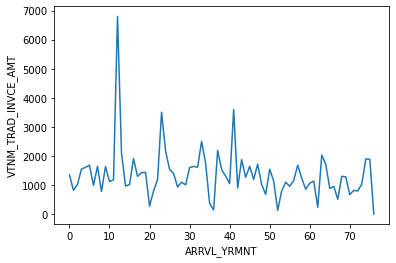

In [15]:
sns.lineplot(data=vietnam_vncli, x="ARRVL_YRMNT", y="VTNM_TRAD_INVCE_AMT", ci=None)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=10))
plt.show()

최대값과 최소값을 먼저 파악해보았다.

In [16]:
# 도착항구가 'VNCLI'인
con_df2 = pd.DataFrame(vietnam_vncli[['ARRVL_YRMNT','VTNM_TRAD_INVCE_AMT']])
con_df2.columns = ['도착날짜', '베트남무역송장금액']
con_df2.sort_values(by=['베트남무역송장금액'], axis=0, ascending=False, inplace=True)
con_df2.head(10)

,도착날짜,베트남무역송장금액
9224,2019-01-08,8828.69
4681,2021-02-23,8809.50
8451,2019-04-09,8800.00
1431,2019-04-08,8750.00
8285,2019-05-20,8745.75
2983,2019-05-14,8734.00
6281,2019-06-21,8646.00
8908,2019-03-01,8620.92
5118,2019-05-16,8598.64
4438,2019-04-08,8592.98


운임의 상위값들은 대부분 2019년도에 있음을 확인할 수 있다. 2021년도도 드물게 보인다.

https://tuoitrenews.vn/news/society/20190909/thick-traffic-hinders-expansion-of-busy-seaport-in-ho-chi-minh-city/51220.html

In [17]:
vietnam_vnsgn = vietnam[(vietnam['ARRVL_PRT_NM']=='VNSGN')]
outlier_idx = get_outlier(vietnam_vnsgn, column='VTNM_TRAD_INVCE_AMT', weight=1.5)
vietnam_vnsgn.drop(outlier_idx, axis=0, inplace=True)
vietnam_vnsgn

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,EXPOR_NTN_NM,HS_CD,ARRVL_YRMNT,VTNM_TRAD_INVCE_AMT,ARRVL_PRT_NM
4,CHINA,85076090,2021-02-22,9.15,VNSGN
12,CHINA,85176259,2021-02-22,242.77,VNSGN
34,CHINA,84821000,2021-02-22,25.80,VNSGN
40,CHINA,90328990,2021-02-22,236.50,VNSGN
88,CHINA,85452000,2021-02-23,1126.02,VNSGN
...,...,...,...,...,...
9966,CHINA,91021200,2019-04-05,872.50,VNSGN
9967,CHINA,91021200,2019-04-05,86.50,VNSGN
9970,CHINA,91021200,2019-04-05,134.00,VNSGN
9982,CHINA,29362800,2019-06-08,40.00,VNSGN


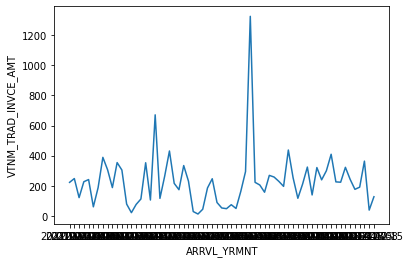

In [18]:
sns.lineplot(data=vietnam_vnsgn, x="ARRVL_YRMNT", y="VTNM_TRAD_INVCE_AMT", ci=None)

# HS코드 분석

In [20]:
vietnam['HS_CD'].unique()

array([85322400, 85030090, 84733090, ..., 34029099, 29362800, 69149000])

In [21]:
vietnam['HS_CD'].nunique()

2089

In [24]:
con_df2 = pd.DataFrame(vietnam['HS_CD'].value_counts())
con_df2['도착항구명'] = con_df2.index
con_df2.columns = ['값 개수', 'HS코드']
con_df2 = con_df2.reset_index().drop('index', axis=1)
con_df2.head(10)

,값 개수,HS코드
0,289,39269099
1,211,73269099
2,121,85332100
3,92,84439990
4,85,73181510
5,81,94051099
6,79,85322400
7,77,95030099
8,69,85177021
9,68,85423900


#### 인사이트1 : 거래되는 상위 3개 품목을 확인해본 결과, 플라스틱 소재 등 산업재가 많았다.

https://news.kotra.or.kr/user/globalBbs/kotranews/784/globalBbsDataView.do?setIdx=403&dataIdx=190241

In [26]:
vietnam_39269099 = vietnam[(vietnam['HS_CD']==39269099)]
vietnam_39269099

,EXPOR_NTN_NM,HS_CD,ARRVL_YRMNT,VTNM_TRAD_INVCE_AMT,ARRVL_PRT_NM
93,CHINA,39269099,2021-02-23,88.82,VNCLI
104,CHINA,39269099,2021-02-23,255.45,VNMTCT
193,CHINA,39269099,2021-02-22,1580.00,VNCLI
217,CHINA,39269099,2021-02-23,28.68,VNCLI
226,CHINA,39269099,2021-02-23,285.64,VNCLI
...,...,...,...,...,...
9883,CHINA,39269099,2019-03-12,1.40,VNSGN
9885,CHINA,39269099,2019-03-12,460.00,VNSGN
9899,CHINA,39269099,2019-03-12,30.00,VNHAN
9924,CHINA,39269099,2019-03-12,53136.72,VNGEE


In [29]:
outlier_idx1 = get_outlier(df=vietnam_39269099, column='VTNM_TRAD_INVCE_AMT', weight=1.5)
vietnam_39269099.drop(outlier_idx1, axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


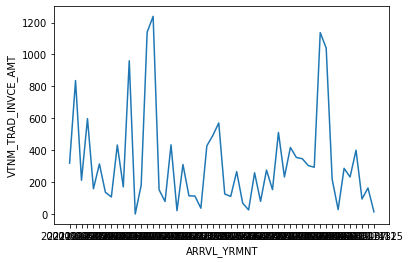

In [34]:
sns.lineplot(data=vietnam_39269099, x="ARRVL_YRMNT", y="VTNM_TRAD_INVCE_AMT", ci=None)

In [39]:
con_df3 = pd.DataFrame(vietnam_39269099[['ARRVL_YRMNT','VTNM_TRAD_INVCE_AMT']])
con_df3.columns = ['도착날짜', '베트남무역송장금액']
con_df3.sort_values(by=['도착날짜'], axis=0, ascending=False, inplace=True)
con_df3.head(10)

,도착날짜,베트남무역송장금액
93,2021-02-23,88.82
729,2021-02-23,40.31
836,2021-02-23,75.45
840,2021-02-23,541.00
854,2021-02-23,49.50
868,2021-02-23,367.62
871,2021-02-23,30.00
956,2021-02-23,210.00
983,2021-02-23,895.44
4662,2021-02-23,366.87


도착날짜에 중복값이 있으니 lineplot이 적합하지 않을 수도 있다는 결론이 나옴.

# 39269099 분석

In [41]:
vietnam_39269099['ARRVL_YRMNT'].unique()

array(['2021-02-23', '2021-02-22', '2019-05-10', '2019-07-18',
       '2019-06-10', '2019-04-08', '2019-05-11', '2019-02-26',
       '2019-03-19', '2019-02-07', '2019-03-07', '2019-02-05',
       '2019-01-28', '2019-03-27', '2019-06-11', '2019-04-09',
       '2019-07-24', '2019-05-14', '2019-07-25', '2019-06-13',
       '2019-05-12', '2019-07-22', '2019-07-19', '2019-06-12',
       '2019-07-17', '2019-02-03', '2019-07-27', '2019-05-16',
       '2019-06-21', '2019-08-07', '2019-06-22', '2019-04-18',
       '2019-05-22', '2019-04-17', '2019-08-03', '2019-05-23',
       '2019-01-07', '2019-01-08', '2019-07-30', '2019-05-20',
       '2019-01-10', '2019-06-18', '2019-04-16', '2019-04-15',
       '2019-04-13', '2019-03-01', '2019-02-01', '2019-01-17',
       '2019-03-14', '2019-01-18', '2019-03-12', '2019-07-15'],
      dtype=object)

In [42]:
vietnam_39269099['ARRVL_YRMNT'].nunique()

52

In [53]:
con_df4 = pd.DataFrame(vietnam_39269099['ARRVL_YRMNT'].value_counts())
con_df4['도착항구명'] = con_df4.index
con_df4.columns = ['거래건수', '도착날짜']
con_df4 = con_df4.reset_index().drop('index', axis=1)
con_df4.head(20)

,거래건수,도착날짜
0,37,2021-02-23
1,11,2019-06-10
2,11,2019-01-08
3,9,2019-07-18
4,9,2019-04-17
5,8,2019-04-18
6,8,2019-06-18
7,7,2019-06-13
8,7,2019-05-10
9,7,2019-02-26


In [54]:
con_df4 = con_df4.sort_values(by = '도착날짜')
con_df4
# creating a ts object
# data['Order Date'] = pd.to_datetime(data['Order Date'])
# data.index = data['Order Date']
# data = data.resample('M').sum()

,거래건수,도착날짜
32,3,2019-01-07
2,11,2019-01-08
23,3,2019-01-10
18,5,2019-01-17
36,2,2019-01-18
14,6,2019-01-28
21,5,2019-02-01
31,3,2019-02-03
48,1,2019-02-05
46,1,2019-02-07


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52265 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52265 missing from current font.
  font.set_te

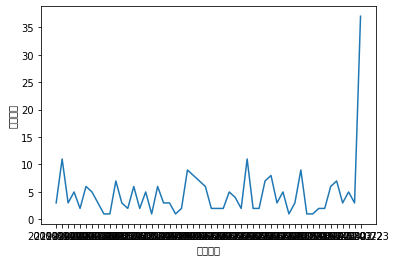

In [56]:
_ = sns.lineplot(data=con_df4, x="도착날짜", y="거래건수", ci=None)

HS코드가 39269099인 경우, 2021년 2월 23일에 거래건수가 가장 많았고, 이는 베트남 설 연휴에 따른 재고보관에 영향이라 볼 수 있다.

# HS코드 73269099

In [58]:
vietnam_73269099 = vietnam[(vietnam['HS_CD']==73269099)]
vietnam_73269099
vietnam_73269099['ARRVL_YRMNT'].unique()

array(['2021-02-23', '2019-05-10', '2019-07-18', '2019-04-08',
       '2019-07-19', '2019-06-10', '2019-04-09', '2019-05-11',
       '2019-02-26', '2019-03-19', '2019-01-21', '2019-01-11',
       '2019-03-07', '2019-03-28', '2019-01-28', '2019-01-27',
       '2019-07-24', '2019-05-14', '2019-06-13', '2019-05-15',
       '2019-05-12', '2019-06-11', '2019-06-12', '2019-07-17',
       '2019-07-25', '2019-06-09', '2019-03-05', '2019-02-03',
       '2019-05-16', '2019-07-27', '2019-06-17', '2019-05-17',
       '2019-08-07', '2019-06-22', '2019-08-03', '2019-05-23',
       '2019-04-18', '2019-04-17', '2019-05-22', '2019-06-21',
       '2019-01-08', '2019-05-20', '2019-06-18', '2019-07-30',
       '2019-04-13', '2019-04-15', '2019-01-07', '2019-02-01',
       '2019-03-01', '2019-02-15', '2019-02-16', '2019-01-17',
       '2019-03-14', '2019-01-18', '2019-02-21', '2019-03-12',
       '2019-01-16'], dtype=object)

In [60]:
vietnam_73269099['ARRVL_YRMNT'].nunique()

57

In [61]:
con_df5 = pd.DataFrame(vietnam_73269099['ARRVL_YRMNT'].value_counts())
con_df5['도착항구명'] = con_df5.index
con_df5.columns = ['거래건수', '도착날짜']
con_df5 = con_df5.reset_index().drop('index', axis=1)
con_df5.head(20)

,거래건수,도착날짜
0,19,2021-02-23
1,13,2019-06-10
2,10,2019-08-03
3,9,2019-04-08
4,8,2019-04-17
5,8,2019-05-23
6,7,2019-01-08
7,7,2019-02-03
8,7,2019-01-21
9,7,2019-03-01


In [62]:
con_df5 = con_df5.sort_values(by = '도착날짜')
con_df5

,거래건수,도착날짜
47,1,2019-01-07
6,7,2019-01-08
46,1,2019-01-11
55,1,2019-01-16
22,4,2019-01-17
42,1,2019-01-18
8,7,2019-01-21
48,1,2019-01-27
36,2,2019-01-28
12,5,2019-02-01


##### 2021년 1월 28일부터 3주간 베트남은 Lockdown에 들어갔고, 계산해보면 2월 18일에 Lockdown이 끝났음을 확인함.

https://e.vnexpress.net/news/news/vietnam-imposes-series-of-lockdowns-over-covid-19-variant-4230168.html

# HS코드와 송장비용간의 관계

In [64]:
# 도착항구가 'VNCLI'인
con_df6 = pd.DataFrame(vietnam_vncli[['HS_CD','VTNM_TRAD_INVCE_AMT']])
con_df6.columns = ['HS코드', '베트남무역송장금액']
con_df6.sort_values(by=['베트남무역송장금액'], axis=0, ascending=False, inplace=True)
con_df6.head(10)

,HS코드,베트남무역송장금액
9224,55151900,8828.69
4681,32041190,8809.50
8451,32049000,8800.00
1431,84829100,8750.00
8285,84193919,8745.75
2983,84771039,8734.00
6281,73079190,8646.00
8908,39206210,8620.92
5118,85045093,8598.64
4438,54074200,8592.98


55151900 = 옷감 관련
, 32041190 = 색소(염색)
, 32049000 = 인공색소(식품관련)

HS코드를 송장금액이 높은 순으로 나열을 했을 때, 상위 값들이 옷감, 색소 등 가격대가 높지 않은 제품 위주인 것을 보면, 가격에 따른 송장금액 상승보다는 거래량이 많았던 것으로 분석됨.